# Visualizing vaccinations rates for MMR in Federation of Bosnia and Herzegovina (2009-2017)

## Loading necessary libraries

- There will probably be some dependencies that need to be installed such as [descartes](https://pypi.org/project/descartes/) and some others.
```
!pip3 install decartes
!pip3 install gspread-pandas
!pip3 install pillow
```

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
from gspread_pandas import Spread
import matplotlib.pyplot as plt

## Loading necessary data and shapefiles

### Loading data

### Loading shapefiles

In [2]:
mmr = 'https://docs.google.com/spreadsheets/d/1sCQ_oQ0Eh6TOJxKw4ViXk_zbiHJHNicF_Jr33KFZ8gM/export?gid=914967512&format=xlsx'
mmr2009_2017 = pd.read_excel(mmr)
mmr2009_2017.head()

GADM Kanton  2017  2016  2015  2014  2013  2012  2011  2010  \
0          Una-Sana    USK  83.5  71.1  82.6  90.5  93.3  92.9  88.6  88.0   
1          Posavina     PK  87.7  80.0  71.4  76.0  69.1  97.4  87.9  87.5   
2              Tuza     TK  79.5  77.4  93.9  88.6  83.9  91.1  82.4  83.3   
3      Zenica-Doboj    ZDK  62.4  64.5  78.6  88.7  91.6  92.1  93.2  90.1   
4  Bosnian Podrinje    BPK  65.5  61.4  80.6  91.2  98.1  98.9  97.7  94.4   

   2009  
0  96.5  
1  79.4  
2  87.0  
3  92.2  
4  89.7

In [3]:
shp_cantons = '../utils/gadm36_BIH_shp/gadm36_BIH_2.shp'
canton_map = gpd.read_file(shp_cantons)

In [4]:
canton_map.head()

GID_0                  NAME_0    GID_1                          NAME_1  \
0   BIH  Bosnia and Herzegovina  BIH.1_1                           Brčko   
1   BIH  Bosnia and Herzegovina  BIH.2_1  Federacija Bosna i Hercegovina   
2   BIH  Bosnia and Herzegovina  BIH.2_1  Federacija Bosna i Hercegovina   
3   BIH  Bosnia and Herzegovina  BIH.2_1  Federacija Bosna i Hercegovina   
4   BIH  Bosnia and Herzegovina  BIH.2_1  Federacija Bosna i Hercegovina   

  NL_NAME_1      GID_2               NAME_2  \
0      None  BIH.1.1_1                Brčko   
1      None  BIH.2.1_1     Bosnian Podrinje   
2      None  BIH.2.2_1            Canton 10   
3      None  BIH.2.3_1       Central Bosnia   
4      None  BIH.2.4_1  Herzegovina-Neretva   

                                           VARNAME_2 NL_NAME_2  \
0                                               None      None   
1         Bosansko-podrinjski|Goraždansko-podrinjski      None   
2  Hercegbosanski| Hercegovačko-bosanski| West Bo...      None   
3                  Centralnobosanski|Srednjobosanski      None   
4                            Hercegovackoneretvanski      None   

            TYPE_2 ENGTYPE_2  CC_2 HASC_2  \
0             None      None  None  BA.BR   
1  Županija|kanton    Canton  None   None   
2  Županija|kanton    Canton  None   None   
3  Županija|kanton    Canton  None   None   
4  Županija|kanton    Canton  None   None   

                                            geometry  
0  POLYGON ((18.95795631 44.86178207, 18.95663261...  
1  POLYGON ((18.61360359 43.61727524, 18.60750389...  
2  POLYGON ((17.0373497 43.57102585, 17.03676224 ...  
3  POLYGON ((18.07413483 43.82367325, 18.06675911...  
4  POLYGON ((17.96372414 42.9450798, 17.96183968 ...

### Checking map of Bosnia and Herzegovina with cantons (FBIH) and regions (RS)

In [5]:
plt.rcParams["figure.figsize"] = [10,10]
canton_map.plot(color='darkred')

### Merging geo and MMR data

In [6]:
print(canton_map.shape)
print(mmr2009_2017.shape)
mmr_cantons = canton_map.set_index('NAME_2').join(mmr2009_2017.set_index('GADM'))
print(mmr_cantons.shape)

(18, 14)
(11, 11)
(18, 23)


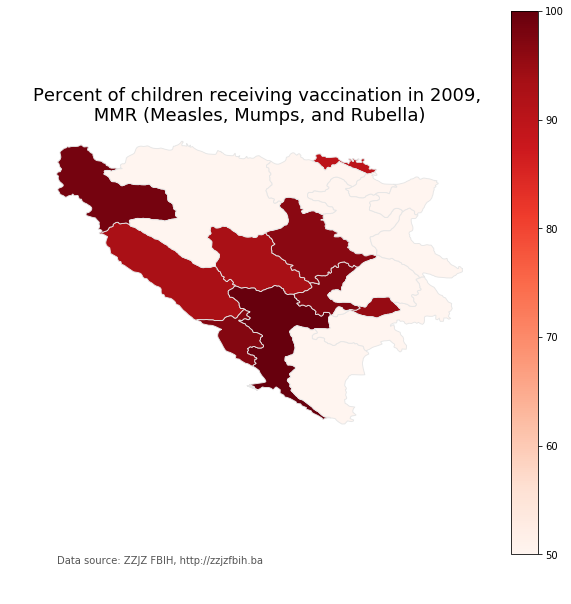

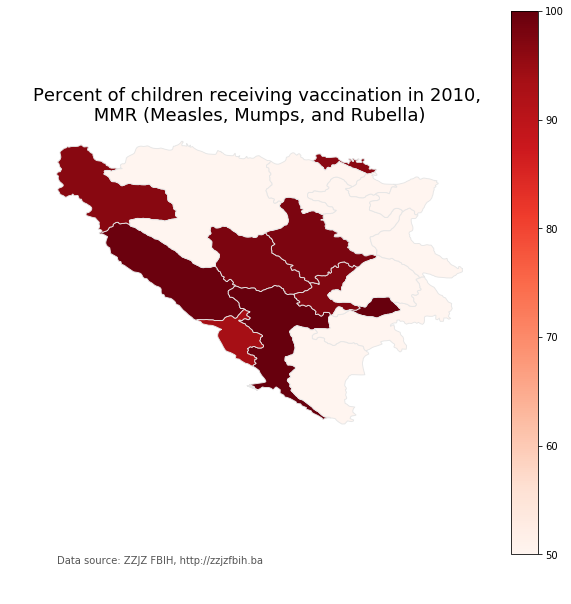

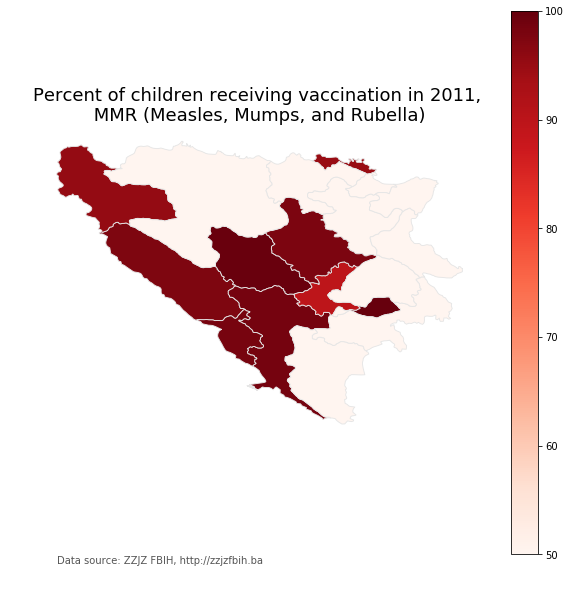

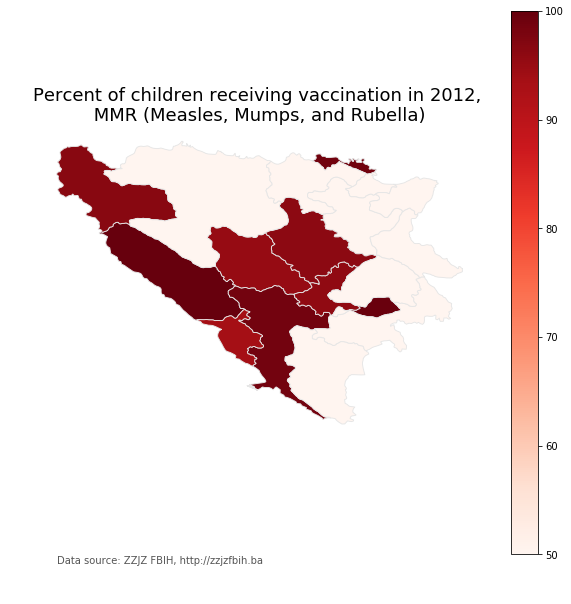

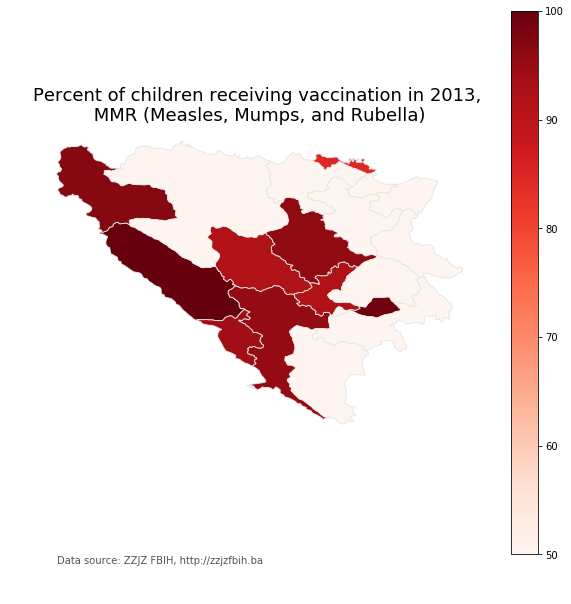

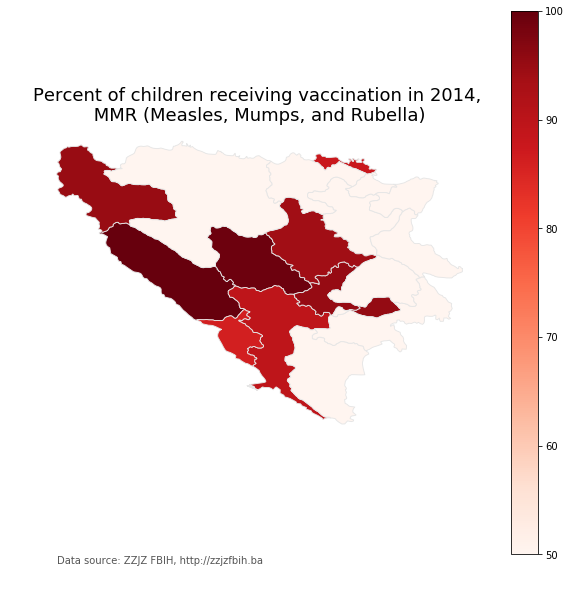

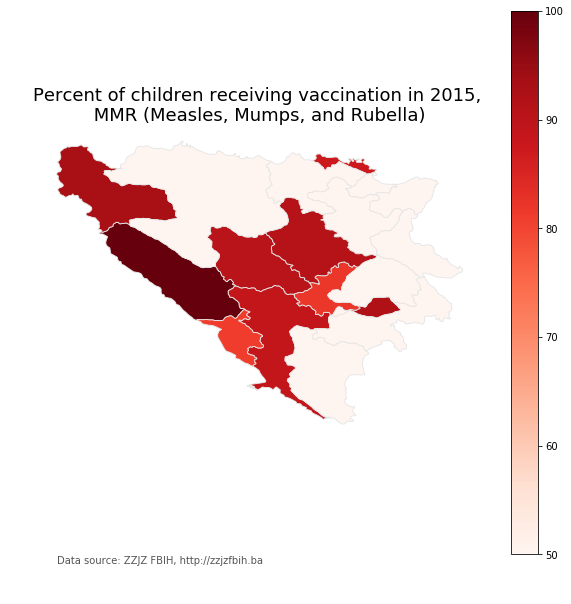

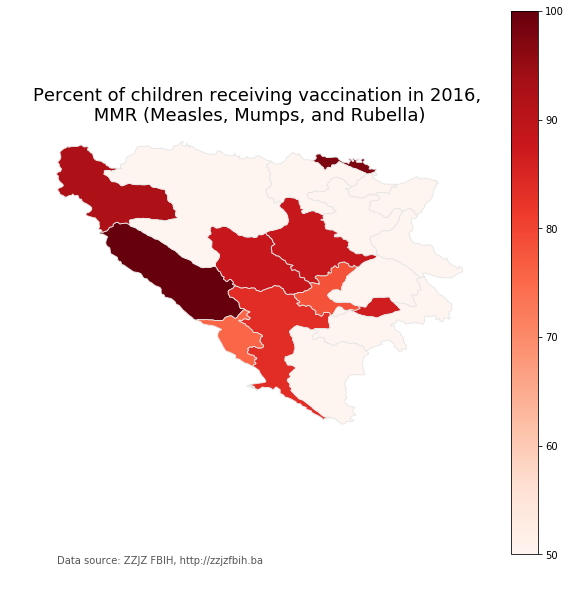

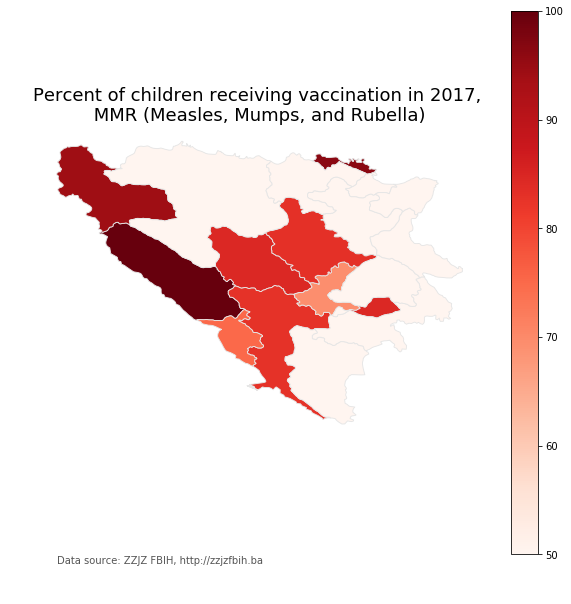

In [7]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
for year in years:
    mmr_cantons[[year]] = np.where(mmr_cantons[[year]].isna(), 0, mmr_cantons[[year]])
    # Setting the percentage range
    vmin, vmax = 50, 100
    # Create matplotlib layout
    fig, ax = plt.subplots(1, figsize=(10, 10))
    # Visualize the map
    mmr_cantons.plot(column=year, cmap='Reds', linewidth=0.9, ax=ax, edgecolor='0.9')
    # Customizing and annotating the map
    ax.axis('off')
    # Adding title
    ax.set_title(f"Percent of children receiving vaccination in {year}, \n MMR (Measles, Mumps, and Rubella) ", \
              fontdict={'fontsize': '18',
                        'fontweight' : '5'})
    # Data source
    ax.annotate('Data source: ZZJZ FBIH, http://zzjzfbih.ba',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
    # Colorbar legend
    mmr_plot = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    mmr_plot._A = []
    cbar_mmr = fig.colorbar(mmr_plot)
    # this will save the figure as a high-res png. you can also save as svg
    fig.savefig(f'output/vaccine_map_{year}.jpg', dpi=1000)

### Converting images to gif

In [83]:
!convert -delay 60 -loop 0 output/vaccine_map_2009.jpg output/vaccine_map_2010.jpg output/vaccine_map_2011.jpg output/vaccine_map_2012.jpg output/vaccine_map_2013.jpg output/vaccine_map_2014.jpg output/vaccine_map_2015.jpg output/vaccine_map_2016.jpg output/vaccine_map_2017.jpg  output/vaccination_trends_fbih.gif

![vaccination_trend](output/vaccination_trends_fbih.gif)
